# **Web Scraping & Data Handling Challenge**

Presentor - **Prinsa Sharma**

Contribution - Individual

Github Link -



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [3]:
#import all necessary labraries

from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import re


## **Scrapping Movies Data**

In [ ]:
# Necessary imports
import requests
from bs4 import BeautifulSoup

# Specifying the URL from which movies related data will be fetched
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
response = requests.get(url)

# It's a good practice to check if the request was successful
if response.status_code == 200:
    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(response.content, 'html.parser')  # Use page.content for binary content

    # Printing the prettified HTML content (this could be a large output)
    print(soup.prettify())
else:
    print("Error fetching the page: Status code", response.status_code)


## **Fetching Movie URL's**

In [63]:

#first of all defining a movie title list

movie_title_list=[]# List to store all movie title

# Extracting all movie titles from  tag and storing them in movie_titles
movie_titles = soup.find_all('a',class_='title-list-grid__item--link',attrs={'href':True})

# Extracting each movie title from movie_titles and storing in movie_title_list
for movie_title in movie_titles:

    # Extract the 'href' attribute value, which contains the movie title
    data_id_value = movie_title['href']

    # Removing the '/in/movie/' prefix to get the clean movie title
    data_id_value = data_id_value.replace("/in/movie/","")

    # Converting the movie title to uppercase and appending to the list
    movie_title_list.append(data_id_value.upper())


#  now fetching Movie url using movie titles

movie_url_list=[] # List to store all movie urls

# For every movie title present in movies_title_list , Finding their url
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    movie_url_list.append(absolute_url)
#Printing first 4 movie url
print('\n'.join(movie_url_list[0:4]))


## **Scrapping Movie Title**

In [44]:
# Movie title has been extracted in previous block now printing first 4 movie title
print('\n'.join(movie_title_list[0:4]))

HANU-MAN
OPPENHEIMER
UNTITLED-SHAHID-KAPOOR-KRITI-SANON-FILM
FIGHTER-2022


## **Scrapping release Year**

In [43]:
    # Movie release year
movie_release_year_list = []# List to store all movie release year

# For every movie title present in movies_title_list , Finding their release year
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
  absolute_url = 'https://www.justwatch.com/in/movie/' + movie

    # Sending an HTTP GET request to the
  response_ry = requests.get(absolute_url)

    # Parsing HTML content with Beautiful Soup
  soup_ry = BeautifulSoup(response_ry.text,'html.parser')
  element = soup_ry.find('span', class_='text-muted')
  if element:
            movie_release_year = element.text.strip().strip("()")
  else:
            movie_release_year = "Not Found"


  movie_release_year=movie_release_year.replace("(","")
  movie_release_year=movie_release_year.replace(")","")
  movie_release_year_list.append(movie_release_year)
# Printing release year of first 4 movie for testing the code
print('\n'.join(movie_release_year_list[0:4]))

2024
2023
2024
2024


## **Scrapping Genres**

In [46]:
# Movie genre

movie_genre_list = []# List to store all movie genre

# For every movie title present in movies_title_list , Finding their genre
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is genres
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Genres')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_genre_list.append(div_element.text.strip())
        else:
            movie_genre_list.append("Genre Not Listed")
    else:
         movie_genre_list.append("Genre Not Listed")
# Printing movie genre for first 4 movies for testing the code
print('\n'.join(movie_genre_list[0:4]))


Fantasy, Action & Adventure, Comedy, Science-Fiction
Drama, History
Comedy, Drama, Romance, Science-Fiction
Action & Adventure, Mystery & Thriller, War & Military


## **Scrapping IMBD Rating**

In [53]:
# Write Your Code here

movie_imdb_list = []# List to store all movie imdb rating

# For every movie title present in movies_title_list , Finding their Imdb Rating
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text, 'html.parser')

    # Selecting only those h3 whose heading is Rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            inside_div = div_element.find_all('div', class_='jw-scoring-listing__rating')

            # Check if inside_div is non-empty
            if inside_div:
                inside_div_last = inside_div[-1] # extracting last div of inside div as last div elemnt contains span (in which last span contains rating)

                # Check if inside_div_last is non-empty
                if inside_div_last:
                    span_all = inside_div_last.find_all('span')

                    # Check if span_all is non-empty
                    if span_all:
                        span_last = span_all[-1] # Here we are extracting rating from the last span(span_last) inside last div(inside_div_last) of main div_element(div_element)
                        movie_imdb_list.append(span_last.text.strip())
                    else:
                        movie_imdb_list.append("Imdb Rating Not Listed.")
                else:
                    movie_imdb_list.append("Imdb Rating Not Listed.")
            else:
                movie_imdb_list.append("Imdb Rating Not Listed.")
        else:
            movie_imdb_list.append("Imdb Rating Not Listed.")
    else:
        movie_imdb_list.append("Imdb Rating Not Listed.")
# Printing movie imdb rating for first 4 movies for testing the code
print('\n'.join(movie_imdb_list[0:4]))

8.0  (21k)
8.3  (706k)
6.6  (44k)
6.4  (42k)


## **Scrapping Runtime/Duration**

In [48]:
# Write Your Code here

# Movie Runtime/Duration

movie_runtime_list=[]# List to store all movie runtime/duration

# For every movie title present in movies_title_list , Finding their Runtime/Duration
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is runtine
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_runtime_list.append(div_element.text.strip())
        else:
            movie_runtime_list.append("No Runtime/Duration mentioned")
    else:
      movie_runtime_list.append("No Runtime/Duration mentioned")

# Printing movie runtime for first 4 movies for testing the code
print('\n'.join(movie_runtime_list[0:4]))

2h 39min
3h 0min
2h 21min
2h 47min


## **Scrapping Age Rating**

In [49]:
# Write Your Code here
# Movie Age Rating

movie_age_rating_list = []# List to store all movie age rating

# For every movie title present in movies_title_list , Finding their Age Rating
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is Age rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_age_rating_list.append(div_element.text.strip())
        else:
            movie_age_rating_list.append("Age Rating Not Listed.")
    else:
         movie_age_rating_list.append("Age Rating Not Listed.")
# Printing age rating for first 4 movies for testing the code
print('\n'.join(movie_age_rating_list[0:4]))

UA
UA
Age Rating Not Listed.
UA


## **Fetching Production Countries Details**

In [50]:
# Movie Production Country

movie_production_country_list=[]# List to store all movie production country

# For every movie title present in movies_title_list , Finding their Production country
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose sub-heading inside details- infos is 'Production Country'
    h3_element = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_production_country_list.append(div_element.text.strip())
        else:
            movie_production_country_list.append("Production Country Not Listed")
    else:
       movie_production_country_list.append("Production Country Not Listed")

# Printing production country details for first 4 movies for testing the code
print('\n'.join(movie_production_country_list[0:4]))

India
United Kingdom, United States
India
India


## **Fetching Streaming Service Details**

In [51]:
# Movie Streaming Service Platform

movie_streaming_list=[]# List to store all movie streaming platform

# For every movie title present in movies_title_list , Finding their Streaming Platform
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Finding the outer div element with the class "buybox-row stream"
    outer_div = soup.find('div', class_='buybox-row stream')

    if outer_div:
        # Finding the nested div with class "buybox-row__offers" inside the outer div
        inner_div = outer_div.find('div', class_='buybox-row__offers')

        if inner_div:
            # Find the picture element within the nested div
            picture_element = inner_div.find('picture')

            if picture_element:
                # Extract the alt attribute from the img element inside the picture which contains streaming platform name
                img_element = picture_element.find('img')
                if img_element:
                    alt_text = img_element['alt']
                    movie_streaming_list.append(alt_text)
                else:
                    movie_streaming_list.append("Not Available for Streaming.")
            else:
                movie_streaming_list.append("Not Available for Streaming.")
        else:
            movie_streaming_list.append("Not Available for Streaming.")
    else:
        movie_streaming_list.append("Not Available for Streaming.")

# Printing streaming services details for first 4 movies for testing the code
print('\n'.join(movie_streaming_list[0:4]))

Jio Cinema
Jio Cinema
Amazon Prime Video
Netflix


## **Now Creating Movies DataFrame**

In [59]:
# Creating Movies Dataframe
max_length = max(len(movie_title_list), len(movie_imdb_list), len(movie_release_year_list), len(movie_genre_list), len(movie_runtime_list), len(movie_age_rating_list), len(movie_production_country_list), len(movie_streaming_list), len(movie_url_list))

movie_title_list += [None] * (max_length - len(movie_title_list))
movie_imdb_list += [None] * (max_length - len(movie_imdb_list))
movie_release_year_list += [None] * (max_length - len(movie_release_year_list))
movie_genre_list += [None] * (max_length - len(movie_genre_list))
movie_runtime_list += [None] * (max_length - len(movie_runtime_list))
movie_age_rating_list += [None] * (max_length - len(movie_age_rating_list))
movie_production_country_list += [None] * (max_length - len(movie_production_country_list))
movie_streaming_list += [None] * (max_length - len(movie_streaming_list))
movie_url_list += [None] * (max_length - len(movie_url_list))

data_movies = {
    'Movie Title':movie_title_list,
    'IMDB Rating':movie_imdb_list,
    'Release Year':movie_release_year_list,
    'Genre':movie_genre_list,
    'Runtime/Duration':movie_runtime_list,
    'Age Rating':movie_age_rating_list,
    'Production Country':movie_production_country_list,
    'Streaming Platform':movie_streaming_list,
    'Url':movie_url_list
}

df_movies = pd.DataFrame(data_movies)
# Printing first 5 elements of dataframe
print(df_movies.head())

                               Movie Title  IMDB Rating Release Year  \
0                                 HANU-MAN   8.0  (21k)         2024   
1                              OPPENHEIMER  8.3  (706k)         2023   
2  UNTITLED-SHAHID-KAPOOR-KRITI-SANON-FILM   6.6  (44k)         2024   
3                             FIGHTER-2022   6.4  (42k)         2024   
4                              POOR-THINGS  8.0  (225k)         2023   

                                               Genre Runtime/Duration  \
0  Fantasy, Action & Adventure, Comedy, Science-F...         2h 39min   
1                                     Drama, History          3h 0min   
2            Comedy, Drama, Romance, Science-Fiction         2h 21min   
3  Action & Adventure, Mystery & Thriller, War & ...         2h 47min   
4            Science-Fiction, Romance, Comedy, Drama         2h 22min   

               Age Rating                      Production Country  \
0                      UA                                  

## **Scraping TV  Show Data**

In [60]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv=BeautifulSoup(page.text,'html.parser')

## **Fetching Tv shows Url details**

In [74]:
# For fetching URL, first defining tv show title list

tv_show_title_list=[] # List to store all tv show title

# Extracting all tv show titles and storing them in tv_show_titles
tv_show_titles = soup_tv.find_all('a',class_='title-list-grid__item--link',attrs={'href':True})

# Extracting each tv show title from tv_show_titles and storing in tv_show_title_list
for tv_show_title in tv_show_titles:

    # Extract the 'href' attribute value, which contains the tv_show title
    data_id_value = tv_show_title['href']

    # Removing the '/in/tv-show/' prefix to get the clean tv_show title
    data_id_value = data_id_value.replace("/in/tv-show/","")

    # Converting the tv_show title to uppercase and appending to the list
    tv_show_title_list.append(data_id_value.upper())

    # Fetching URL using tv show title
tv_show_url_list=[] # List to store all tv show urls

# For every tv show title present in tv_show_title_list , Finding their url
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show

    tv_show_url_list.append(absolute_url)

#Printing first 4 tv show url
print('\n'.join(tv_show_url_list[0:4]))

https://www.justwatch.com/in/tv-show/SHOGUN-2024
https://www.justwatch.com/in/tv-show/MIRZAPUR
https://www.justwatch.com/in/tv-show/3-BODY-PROBLEM
https://www.justwatch.com/in/tv-show/PANCHAYAT


## **Fetching Tv Show Title details**

In [75]:
# Tv show title has been extracted in previous block now printing first 4 tv show title
print('\n'.join(tv_show_title_list[0:4]))


SHOGUN-2024
MIRZAPUR
3-BODY-PROBLEM
PANCHAYAT


## **Fetching Release Year**

In [78]:
    # Movie release year
tv_show_release_year_list = []# List to store all movie release year

# For every movie title present in movies_title_list , Finding their release year
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each movie
  absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show

    # Sending an HTTP GET request to the
  response_ry = requests.get(absolute_url)

    # Parsing HTML content with Beautiful Soup
  soup_ry = BeautifulSoup(response_ry.text,'html.parser')
  element = soup_ry.find('span', class_='text-muted')
  if element:
            tv_show_release_year = element.text.strip().strip("()")
  else:
            tv_show_release_year = "Not Found"


  tv_show_release_year=tv_show_release_year.replace("(","")
  tv_show_release_year=tv_show_release_year.replace(")","")
  tv_show_release_year_list.append(tv_show_release_year)
# Printing release year of first 4 tv shows for testing the code
print('\n'.join(tv_show_release_year_list[0:4]))

2024
Not Found
Not Found
Not Found


## **Fetching TV Show Genre Details**

In [80]:
# Tv Shows Genre

tv_show_genre_list = [] # List to store all tv show Genres

# For every tv show title present in tv_show_title_list , Finding their Genre
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose heading is genres
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Genres')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_genre_list.append(div_element.text.strip())
        else:
            tv_show_genre_list.append("Genre Not Listed")
    else:
         tv_show_genre_list.append("Genre Not Listed")

# Printing genre of first 10 tv shows for testing the code
print('\n'.join(tv_show_genre_list[0:10]))

Drama, War & Military, History
Crime, Action & Adventure, Drama, Mystery & Thriller
Science-Fiction, Mystery & Thriller, Drama, Fantasy
Comedy, Drama
Drama
Crime, Action & Adventure, Comedy, Drama
Fantasy, Action & Adventure, Drama, Science-Fiction
Genre Not Listed
Genre Not Listed
Genre Not Listed


## **Fetching IMDB Rating Details**

In [81]:
# Tv Shows  Imdb Rating

tv_show_imdb_list = [] # List to store all tv show Imdb Rating

# For every tv show title present in tv_show_title_list , Finding their Imdb Rating
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Selecting only those h3 whose heading is Rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            inside_div = div_element.find_all('div', class_='jw-scoring-listing__rating')

            # Check if inside_div is non-empty
            if inside_div:
                inside_div_last = inside_div[-1] # extracting last div of inside div as last div elemnt contains span (in which last span contains rating)

                # Check if inside_div_last is non-empty
                if inside_div_last:
                    span_all = inside_div_last.find_all('span')

                    # Check if span_all is non-empty
                    if span_all:
                        span_last = span_all[-1] # Here we are extracting rating from the last span(span_last) inside last div(inside_div_last) of main div_element(div_element)
                        tv_show_imdb_list.append(span_last.text.strip())
                    else:
                        tv_show_imdb_list.append("Imdb Rating Not Listed.")
                else:
                    tv_show_imdb_list.append("Imdb Rating Not Listed.")
            else:
                tv_show_imdb_list.append("Imdb Rating Not Listed.")
        else:
            tv_show_imdb_list.append("Imdb Rating Not Listed.")
    else:
        tv_show_imdb_list.append("Imdb Rating Not Listed.")
# Printing imdb of first 10 tv shows for testing the code
print('\n'.join(tv_show_imdb_list[0:10]))



9.1  (52k)
8.5  (81k)
7.7  (58k)
8.9  (84k)
7.9  (9k)
8.2  (68k)
9.2  (2m)
Imdb Rating Not Listed.
Imdb Rating Not Listed.
Imdb Rating Not Listed.


## **Fetching Age Rating Details**

In [82]:
# Tv Shows Age Rating

tv_show_age_rating_list = [] # List to store all tv show Age Ratings

# For every tv show title present in tv_show_title_list , Finding their Age Rating
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose heading is Age rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_age_rating_list.append(div_element.text.strip())
        else:
            tv_show_age_rating_list.append("Age Rating Not Listed.")
    else:
         tv_show_age_rating_list.append("Age Rating Not Listed.")

# Printing age rating of first 10 tv shows for testing the code
print('\n'.join(tv_show_age_rating_list[0:10]))


Age Rating Not Listed.
Age Rating Not Listed.
A
Age Rating Not Listed.
UA
A
Age Rating Not Listed.
Age Rating Not Listed.
Age Rating Not Listed.
Age Rating Not Listed.


## **Fetching Production Country details**

In [83]:
# Tv Shows Production Country

tv_show_production_country_list=[] # List to store all tv show Production Countries

# For every tv show title present in tv_show_title_list , Finding their Production country
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose sub-heading inside details- infos is 'Production Country'
    h3_element = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_production_country_list.append(div_element.text.strip())
        else:
            tv_show_production_country_list.append("Production Country Not Listed")
    else:
          tv_show_production_country_list.append("Production Country Not Listed")

# Printing production country details of first 10 tv shows for testing the code
print('\n'.join(tv_show_production_country_list[0:10]))

United States
India
United States
India
India
United Kingdom, United States
United States, United Kingdom
India
Production Country Not Listed
Production Country Not Listed


## **Fetching Streaming Service details**

In [84]:
# Tv Shows Streaming Platform

tv_show_streaming_list=[] # List to store all tv show Streaming Platorms

# For every tv show title present in tv_show_title_list , Finding their Streaming Platform
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Finding the outer div element with the class "buybox-row stream"
    outer_div = soup.find('div', class_='buybox-row stream')

    if outer_div:
        # Finding the nested div with class "buybox-row__offers" inside the outer div
        inner_div = outer_div.find('div', class_='buybox-row__offers')

        if inner_div:
            # Find the picture element within the nested div
            picture_element = inner_div.find('picture')

            if picture_element:
                # Extract the alt attribute from the img element inside the picture which contains streaming platform name
                img_element = picture_element.find('img')
                if img_element:
                    alt_text = img_element['alt']
                    tv_show_streaming_list.append(alt_text)
                else:
                    tv_show_streaming_list.append("Not Available for Streaming.")
            else:
                tv_show_streaming_list.append("Not Available for Streaming.")
        else:
            tv_show_streaming_list.append("Not Available for Streaming.")
    else:
        tv_show_streaming_list.append("Not Available for Streaming.")
# Printing streamline services details of first 10 tv shows for testing the code
print('\n'.join(tv_show_streaming_list[0:10]))

Hotstar
Amazon Prime Video
Netflix
Amazon Prime Video
Sony Liv
Netflix
Jio Cinema
Not Available for Streaming.
Not Available for Streaming.
Not Available for Streaming.


## **Fetching Duration Details**

In [85]:
# Tv Shows Runtime/Duration

tv_show_runtime_list=[] # List to store all tv show Runtimes

# For every tv show title present in tv_show_title_list , Finding their Runtime/Duration
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose heading is runtine
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_runtime_list.append(div_element.text.strip())
        else:
            tv_show_runtime_list.append("No Runtime/Duration mentioned")
    else:
      tv_show_runtime_list.append("No Runtime/Duration mentioned")

# Printing duration details of first 10 tv shows for testing the code
print('\n'.join(tv_show_runtime_list[0:10]))


58min
50min
56min
33min
No Runtime/Duration mentioned
No Runtime/Duration mentioned
No Runtime/Duration mentioned
No Runtime/Duration mentioned
No Runtime/Duration mentioned
No Runtime/Duration mentioned


## **Creating TV Show DataFrame**

In [87]:
# Creating Tv Shows Dataframe

data_tv_shows = {
    'Tv_Show Title':tv_show_title_list,
    'IMDB Rating':tv_show_imdb_list,
    'Release Year':tv_show_release_year_list,
    'Genre':tv_show_genre_list,
    'Runtime/Duration':tv_show_runtime_list,
    'Age Rating':tv_show_age_rating_list,
    'Production Country':tv_show_production_country_list,
    'Streaming Platform':tv_show_streaming_list,
    'Url':tv_show_url_list
}

df_tv_shows = pd.DataFrame(data_tv_shows)
# Printing first 5 elements of dataframe
print(df_tv_shows.head())


    Tv_Show Title IMDB Rating Release Year  \
0     SHOGUN-2024  9.1  (52k)         2024   
1        MIRZAPUR  8.5  (81k)    Not Found   
2  3-BODY-PROBLEM  7.7  (58k)    Not Found   
3       PANCHAYAT  8.9  (84k)    Not Found   
4   MAHARANI-2021   7.9  (9k)    Not Found   

                                               Genre  \
0                     Drama, War & Military, History   
1  Crime, Action & Adventure, Drama, Mystery & Th...   
2  Science-Fiction, Mystery & Thriller, Drama, Fa...   
3                                      Comedy, Drama   
4                                              Drama   

                Runtime/Duration              Age Rating Production Country  \
0                          58min  Age Rating Not Listed.      United States   
1                          50min  Age Rating Not Listed.              India   
2                          56min                       A      United States   
3                          33min  Age Rating Not Listed.              

## **Task 2 :- Data Filtering & Analysis**

In [90]:
# Filtering movies and TV shows to include only those released in the last two years and with an IMDB Rating of 7 or higher.

from datetime import datetime, timedelta

# Get the current date
current_date = datetime.now()

# Calculate the date 2 years ago from the current date
two_years_ago = current_date - timedelta(days=365 * 2)

def filter_df(df, release_year_col, imdb_rating_col, years_ago, current_date):
    # Convert 'Release Year' to datetime format
    df[release_year_col] = pd.to_datetime(df[release_year_col], errors='coerce')

    # Filter the DataFrame to include only entries released in the last `years_ago` years
    filtered_df = df[(df[release_year_col] >= two_years_ago) & (df[release_year_col] <= current_date)].copy()

    # Converting 'IMDB Rating' column to a string so that, in the next step, we can convert it to numeric values
    filtered_df.loc[:, imdb_rating_col] = filtered_df[imdb_rating_col].astype(str)

    # Extract numeric part and convert to numeric
    filtered_df[imdb_rating_col] = pd.to_numeric(filtered_df[imdb_rating_col].str.extract(r'([\d.]+)', expand=False), errors='coerce')

    # Filter the DataFrame to include only entries whose IMDb Rating >= 7
    filtered_df = filtered_df[filtered_df[imdb_rating_col] >= 7]

    return filtered_df

# Filtering Movies
filtered_df_movies = filter_df(df_movies, 'Release Year', 'IMDB Rating', two_years_ago, current_date)

# Filtering TV Shows
filtered_df_tv_shows = filter_df(df_tv_shows, 'Release Year', 'IMDB Rating', two_years_ago, current_date)

print(filtered_df_movies.head(2))
print(filtered_df_tv_shows.head(2))



   Movie Title  IMDB Rating Release Year  \
0     HANU-MAN          8.0   2024-01-01   
1  OPPENHEIMER          8.3   2023-01-01   

                                               Genre Runtime/Duration  \
0  Fantasy, Action & Adventure, Comedy, Science-F...         2h 39min   
1                                     Drama, History          3h 0min   

  Age Rating             Production Country Streaming Platform  \
0         UA                          India         Jio Cinema   
1         UA  United Kingdom, United States         Jio Cinema   

                                              Url  
0     https://www.justwatch.com/in/movie/HANU-MAN  
1  https://www.justwatch.com/in/movie/OPPENHEIMER  
  Tv_Show Title  IMDB Rating Release Year                           Genre  \
0   SHOGUN-2024          9.1   2024-01-01  Drama, War & Military, History   

  Runtime/Duration              Age Rating Production Country  \
0            58min  Age Rating Not Listed.      United States   

  Stre

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [91]:

# Calculating Movies mean IMDb rating
movie_mean_imdb = filtered_df_movies['IMDB Rating'].mean()
movie_mean_imdb_rounded = round(movie_mean_imdb, 2)
print("Mean IMDb Rating for Movies is:", movie_mean_imdb_rounded)

# Calculating Tv Shows mean IMDb rating
tv_mean_imdb = filtered_df_tv_shows['IMDB Rating'].mean()
tv_mean_imdb_rounded = round(tv_mean_imdb, 2)
print("Mean IMDb Rating for Tv Shows is:", tv_mean_imdb_rounded)


Mean IMDb Rating for Movies is: 8.0
Mean IMDb Rating for Tv Shows is: 9.1


## **Analyzing Top Genres**

In [96]:
# Top Movies Genres

all_genres = ' '.join(filtered_df_movies['Genre'])



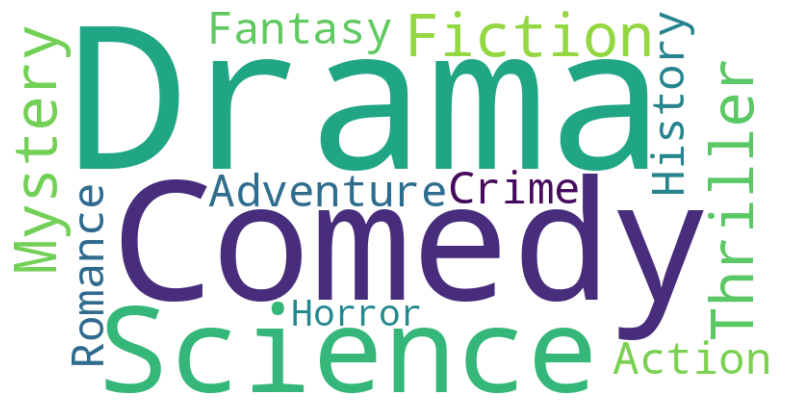

In [95]:
#Let's Visvalize it using word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.show()


## **Finding Predominant Streaming Service**

In [106]:
# Funtion for Finding  Movies / Tv Shows Predominant Streaming Service

# Funtion for Finding  Movies / Tv Shows Predominant Streaming Service

def visualize_streaming_distribution_wordcloud(df):
    # Filter streaming information available
    streaming_platforms = df[df['Streaming Platform'] != 'Not Available for Streaming.']['Streaming Platform']

    # Create a string of streaming platforms
    streaming_text = ' '.join(streaming_platforms)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(streaming_text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Streaming Service Distribution - Word Cloud')
    plt.show()

    # Identify the predominant streaming service
    predominant_service = streaming_platforms.mode().iloc[0]
    print(f"The predominant streaming service is: {predominant_service}")



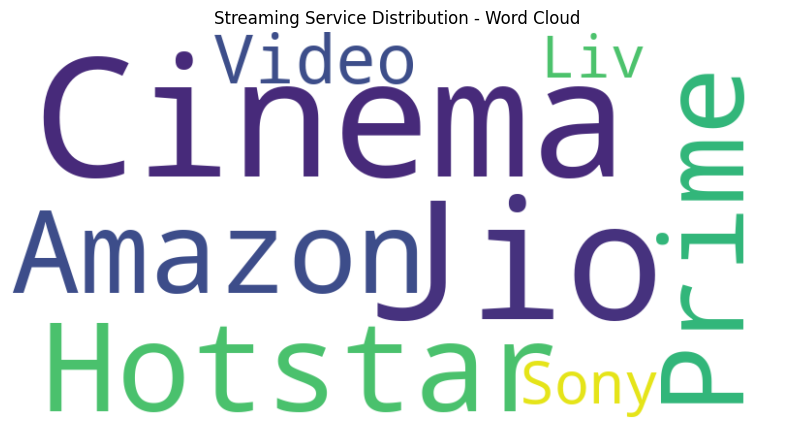

The predominant streaming service is: Jio Cinema


In [107]:
# Visualizing Movies Predominant Streaming Platform using Word Cloud
visualize_streaming_distribution_wordcloud(filtered_df_movies)

## **Task 3 :- Data Export**

In [108]:
#saving final dataframe as Final Data in csv format
df_movies.to_csv('Final_Movies_Data.csv', index=False)
df_tv_shows.to_csv('Final_Tv_Shows_Data.csv', index=False)

In [109]:
#saving filter data as Filter Data in csv format
filtered_df_movies.to_csv('Filtered_Movies_Data.csv', index=False)
filtered_df_tv_shows.to_csv('Filtered_Tv_Shows_Data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

# **Link for Filtered Movie Dataset**
https://drive.google.com/file/d/1x6Pa9LQzpL9mVBxjLrA7VkbaRMUYxN4W/view?usp=sharing

# **Link for Final Movie Data Set**

https://drive.google.com/file/d/1LNKdPp_NEsEi556R7QPZY-BDytpnneIz/view?usp=sharing

# **Link for Filtered Tv Show Dataset**

https://drive.google.com/file/d/1zOwacDXth_3tE-OWiyNARADvaXQuTK1i/view?usp=sharing

# **Link for Final Tv Show Dataset**

https://drive.google.com/file/d/1GpctfxzMM23l8ZjQ7sW8ClUUwdaZnnBY/view?usp=sharing


# ***Congratulations!!! You have completed your Assignment.***